# In this project we will solve two simple environments using a Q-table.

# Exercise

Solve [`FrozenLake8x8-v0`](https://gym.openai.com/envs/FrozenLake8x8-v0/) using a Q-table.


1. Import Necessary Packages:


2. Instantiate the Environment and Agent

3. Set up the QTable:

4. The Q-Learning algorithm training

5. Evaluate how well your agent performs
* Render output of one episode
* Give an average episode return


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
Score over time: 0.44744666666666666
[[2.31065713e-02 2.01260820e-02 1.66628142e-02 5.40522597e-02]
 [2.36374373e-02 2.41432878e-02 7.46295728e-02 1.63750706e-02]
 [2.43071414e-02 2.47056413e-02 5.76417020e-02 1.91366361e-02]
 [3.09852855e-02 3.29354305e-02 7.71948417e-02 3.79562484e-02]
 [3.26698624e-02 2.73099003e-02 1.91775285e-01 3.17777778e-02]
 [2.90146541e-02 4.66210368e-02 1.98464943e-01 5.32559332e-02]
 [7.35853509e-02 2.14112215e-01 8.35934753e-02 7.38791859e-02]
 [8.38796010e-02 7.82230317e-02 1.85720605e-01 2.74559104e-02]
 [1.92656802e-02 2.01727410e-02 1.24361398e-02 6.14304540e-02]
 [1.27148124e-02 2.13628819e-02 1.25872838e-02 4.58606842e-02]
 [8.70064117e-03 1.05855753e-02 1.09502981e-02 5.54301568e-02]
 [1.26476877e-02 2.35257269e-03 1.38635842e-02 6.12432432e-02]
 [2.29934798e-02 9.06345415e-03 3.41487029e-02 1.58289013e-01]
 [7.75982477e-02 2.23047340e-02 1.22744649e-01 4.53880364e-02]
 [7.3448

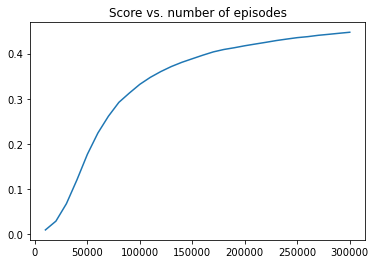

In [52]:
import numpy as np
import gym
import random
import matplotlib.pyplot as plt

#load the environment from OpenAI's gym
env = gym.make("FrozenLake8x8-v1", is_slippery=True)
env.render()

action_size = env.action_space.n #number of all possible actions
state_size = env.observation_space.n #number of all possible states

obs = env.reset()

#we keep a history of the states of the q table and the score, in order to make some visualizations later
qtable_history = [] 
score_history = []
qtable = np.zeros((state_size, action_size)) #initialize the q-table with 0s

"""PARAMETERS"""
total_episodes = 300000        # Total episodes
total_test_episodes = 1000       # Total test episodes
max_steps = 200                # Max steps per episode

learning_rate = 0.81           # Learning rate (alpha)
gamma = 0.96                 # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Maximum exploration rate
min_epsilon = 0.01            # Minimum exploration rate 
decay_rate = 0.0001             # Exponential decay rate for epsilon

returns = [] #list to keep the score of each of the episodes. used for later visualization.

for episode in range(total_episodes):
    # Reset the environment and variables
    state = env.reset()
    step = 0
    done = False
    total_return = 0
    #for the allowed amount of moves
    for step in range(max_steps):
        #Pick an action a in the current state
        
        
        #Randomize a number for epsilon greedy
        epsilon_decider = random.uniform(0,1)
        
        # If this number is greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if epsilon_decider > epsilon:
            action = np.argmax(qtable[state,:])
        
        # Othersie doing a random choice --> exploration
        else:
            action = env.action_space.sample()
        
        # Perform the action and receive the updated info
        new_state, reward, done, info = env.step(action)

        # Update the q-table with the receive information for the state and the action performed
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * 
                                    np.max(qtable[new_state, :]) - qtable[state, action])
                
        state = new_state
        total_return += reward
        if done == True: 
            break
    
    
    # Decrease epsilon
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    returns.append(total_return)
    
    #increase episode count and check if we are going to log it (for later visualization)
    episode_count = episode + 1
    if episode_count % 10000 == 0:
        qtable_history.append(qtable)
        score_history.append(sum(returns)/episode_count)
print ("Score over time: " +  str(sum(returns)/total_episodes)) #not very useful for learning
print(qtable) #q table values

plt.plot(list(range(0, 300000+1, 10000))[1:], score_history) #plot average return vs number of episodes
plt.title("Average return rate vs. number of episodes") #The graph below is wrong! It is plotting the average return vs the number of episodes
print(score_history)


In [66]:
env.reset()
rewards = []

for episode in range(total_test_episodes):
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0

    for step in range(max_steps):
        #pick an action at the given state by looking up the q-table
        action = np.argmax(qtable[state,:])
        #perform it and get the result info
        new_state, reward, done, info = env.step(action)
        
        #add the reward to the total rewards
        total_rewards += reward
        #update state
        state = new_state
        
        if done:
            break
    #log the received reward    
    rewards.append(total_rewards)
env.close()
print ("Score over time: " +  str(sum(rewards)/total_test_episodes))

Score over time: 0.81
